In [1]:
#Import lib
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from my_useful_functions import calculate_performance_statistical_parity,calculate_performance_equalized_odds,calculate_performance_equal_opportunity,calculate_performance_predictive_parity,calculate_performance_predictive_equality,calculate_performance_treatment_equality
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from compute_abroca import *
import numpy as np
import sklearn.metrics as metrics 
from scipy import interpolate
from scipy import integrate
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_law():
    df = pd.read_csv('data/law_school_clean.csv')    
    protected_attribute = 'race'
    majority_group_name = "White"
    minority_group_name = "Non-White"
    class_label = 'pass_bar'
    filename = "RF.law.abroca.pdf"    
    
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [3]:
def load_student_academics():
    df = pd.read_csv('data/student_aca_clean.csv')    
    protected_attribute = 'ge'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "RF.student-academics.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Good-and-higher" else 0 for v in df['class']]
    #Label sex
    df['ge']=["Female" if v == "F" else "Male" for v in df['ge']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [4]:
def load_xAPI_Edu():
    df = pd.read_csv('data/xAPI-Edu-Data.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "RF.xAPI-Edu-Data.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Medium-High" else 0 for v in df['Class']]
    #Label sex
    df['gender']=["Female" if v == "F" else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [5]:
def load_student_mat():
    df = pd.read_csv('data/student_mat_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'Class'
    filename = "RF.student-mat.abroca.pdf"    
    
    #Label class
    df['Class']=[1 if v == "Pass" else 0 for v in df['Class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [6]:
def load_student_por():
    df = pd.read_csv('data/student_por_clean.csv')    
    protected_attribute = 'sex'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'class'
    filename = "RF.student-por.abroca.pdf"    
    
    #Label class
    df['class']=[1 if v == "Pass" else 0 for v in df['class']]
    #Label sex
    df['sex']=["Female" if v == "F" else "Male" for v in df['sex']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [7]:
def load_pisa():
    df = pd.read_csv('data/pisa_clean.csv')    
    protected_attribute = 'gender'
    majority_group_name = "Male"
    minority_group_name = "Female"
    class_label = 'readingScore'
    filename = "RF.pisa.abroca.pdf"    
    
    #Label class
    df['readingScore']=[1 if v == 'High' else 0 for v in df['readingScore']]
    #Label sex
    df['gender']=["Female" if v == 0 else "Male" for v in df['gender']]
    #label encode
    le = preprocessing.LabelEncoder()
    for i in df.columns:
        if df[i].dtypes == 'object':
            df[i] = le.fit_transform(df[i])
    #Splitting data into train and test
    length = len(df.columns)
    X = df.iloc[:,:length-1]
    y = df.iloc[:,length-1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 
    
    #Get index    
    feature = X.keys().tolist()    
    sa_index = feature.index(protected_attribute)
    p_Group = 0 
    
    return X_train, X_test, y_train, y_test,sa_index, p_Group, protected_attribute, filename,majority_group_name,minority_group_name

In [8]:
def run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name):    
      
    #Run DT model
    DT = RandomForestClassifier(max_depth=10, random_state=0)
    DT.fit(X_train,y_train)
    y_predicts = DT.predict(X_test)
    y_pred_probs = DT.predict_proba(X_test)
        
    #Print measures
        
    print("Statistical parity:")
    print(calculate_performance_statistical_parity(X_test.values, y_test.values, y_predicts, sa_index, p_Group))
         
    print("Equal opportunity")
    print(calculate_performance_equal_opportunity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Equalized odds")
    print(calculate_performance_equalized_odds(X_test.values, y_test.values, y_predicts, y_pred_probs, sa_index, p_Group))
         
    print("Predictive parity")
    print(calculate_performance_predictive_parity(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Predictive equality")
    print(calculate_performance_predictive_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
        
    print("Treatment equality")
    print(calculate_performance_treatment_equality(X_test.values, y_test.values, y_predicts,  sa_index, p_Group))
    
    
    # 
    
    #make predictions
    X_test['pred_proba'] = DT.predict_proba(X_test)[:,1:2]
    X_test['true_label'] = y_test
    df_test = X_test
    
    
    #Compute Abroca
    slice = compute_abroca(df_test, pred_col = 'pred_proba' , label_col = 'true_label', protected_attr_col = protected_attribute,
                           majority_protected_attr_val = 1, n_grid = 10000,
                           plot_slices = True, majority_group_name=majority_group_name ,minority_group_name=minority_group_name,file_name = filename)
    print("ABROCA:",slice)
    

In [9]:
#Main function
def run_eval(dataset):
    if dataset == 'law':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_law()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'pisa':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_pisa()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                        
    if dataset == 'student-academics':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_academics()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                            
    if dataset == 'student-mat':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_mat()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                
    if dataset == 'student-por':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_student_por()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    if dataset == 'xAPI-Edu':
        X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name = load_xAPI_Edu()
        run_experiment(X_train, X_test, y_train, y_test,sa_index, p_Group,protected_attribute,filename,majority_group_name,minority_group_name)                                                                        
    

Statistical parity:
{'balanced_accuracy': 0.6071624845092513, 'accuracy': 0.902724358974359, 'fairness': 0.17952620356423243, 'Positive_prot_pred': 0.8092783505154639, 'Positive_non_prot_pred': 0.9888045540796964, 'Negative_prot_pred': 0.19072164948453607, 'Negative_non_prot_pred': 0.011195445920303606}
Equal opportunity
{'balanced_accuracy': 0.6071624845092513, 'accuracy': 0.902724358974359, 'fairness': 0.08809059565268773, 'TPR_protected': 0.9071729957805907, 'TPR_non_protected': 0.9952635914332785, 'TNR_protected': 0.4594594594594595, 'TNR_non_protected': 0.08695652173913043}
Equalized odds
{'balanced_accuracy': 0.6071624845092513, 'accuracy': 0.902724358974359, 'fairness': 0.4605935333730168, 'TPR_protected': 0.9071729957805907, 'TPR_non_protected': 0.9952635914332785, 'TNR_protected': 0.4594594594594595, 'TNR_non_protected': 0.08695652173913043}
Predictive parity
{'balanced_accuracy': 0.6071624845092513, 'accuracy': 0.902724358974359, 'fairness': 0.10580508894095897, 'TPR_protecte

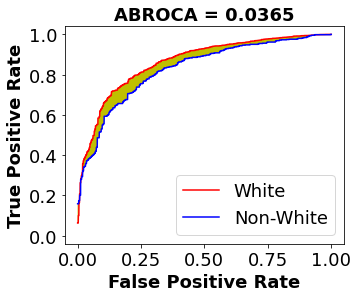

ABROCA: 0.03649935199119619


In [10]:
run_eval('law')

Statistical parity:
{'balanced_accuracy': 0.6888102893890675, 'accuracy': 0.7211350293542075, 'fairness': -0.08849479543791494, 'Positive_prot_pred': 0.7332053742802304, 'Positive_non_prot_pred': 0.6447105788423154, 'Negative_prot_pred': 0.2667946257197697, 'Negative_non_prot_pred': 0.35528942115768464}
Equal opportunity
{'balanced_accuracy': 0.6888102893890675, 'accuracy': 0.7211350293542075, 'fairness': 0.03267932820593311, 'TPR_protected': 0.8521739130434782, 'TPR_non_protected': 0.8194945848375451, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5714285714285714}
Equalized odds
{'balanced_accuracy': 0.6888102893890675, 'accuracy': 0.7211350293542075, 'fairness': 0.10410789963450451, 'TPR_protected': 0.8521739130434782, 'TPR_non_protected': 0.8194945848375451, 'TNR_protected': 0.5, 'TNR_non_protected': 0.5714285714285714}
Predictive parity
{'balanced_accuracy': 0.6888102893890675, 'accuracy': 0.7211350293542075, 'fairness': 0.06684713014442478, 'TPR_protected': 0.8521739130434782, 'TPR

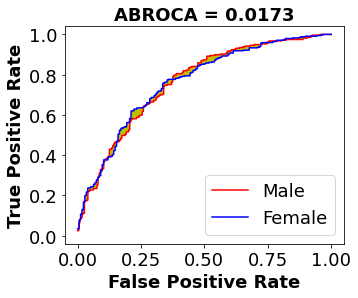

ABROCA: 0.017331431308075646


In [11]:
run_eval('pisa')

Statistical parity:
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': -0.04761904761904767, 'Positive_prot_pred': 1.0, 'Positive_non_prot_pred': 0.9523809523809523, 'Negative_prot_pred': 0.0, 'Negative_non_prot_pred': 0.047619047619047616}
Equal opportunity
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.0, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.5}
Equalized odds
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.5, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.5}
Predictive parity
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.05526315789473679, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.5}
Predictive equality
{'balanced_accuracy': 0.625, 'accuracy': 0.925, 'fairness': 0.5, 'TPR_protected': 1.0, 'TPR_non_protected': 1.0, 'TNR_protected': 0.0, 'TNR_non_protected': 0.5}
Treatment equality


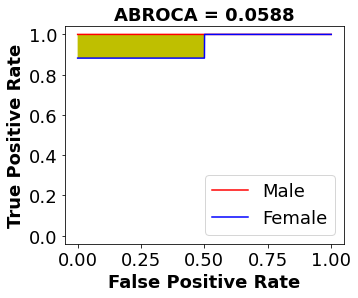

ABROCA: 0.058823529411769604


In [12]:
run_eval('student-academics')

Statistical parity:
{'balanced_accuracy': 0.8936867182846933, 'accuracy': 0.8991596638655462, 'fairness': 0.1876766534765404, 'Positive_prot_pred': 0.5172413793103449, 'Positive_non_prot_pred': 0.7049180327868853, 'Negative_prot_pred': 0.4827586206896552, 'Negative_non_prot_pred': 0.29508196721311475}
Equal opportunity
{'balanced_accuracy': 0.8936867182846933, 'accuracy': 0.8991596638655462, 'fairness': 0.025345622119815725, 'TPR_protected': 0.9032258064516129, 'TPR_non_protected': 0.9285714285714286, 'TNR_protected': 0.9259259259259259, 'TNR_non_protected': 0.7894736842105263}
Equalized odds
{'balanced_accuracy': 0.8936867182846933, 'accuracy': 0.8991596638655462, 'fairness': 0.16179786383521533, 'TPR_protected': 0.9032258064516129, 'TPR_non_protected': 0.9285714285714286, 'TNR_protected': 0.9259259259259259, 'TNR_non_protected': 0.7894736842105263}
Predictive parity
{'balanced_accuracy': 0.8936867182846933, 'accuracy': 0.8991596638655462, 'fairness': 0.02635658914728689, 'TPR_protect

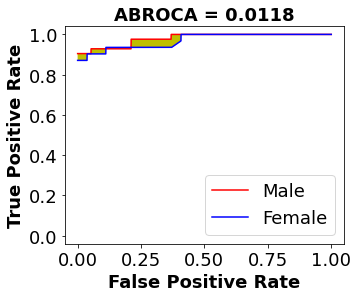

ABROCA: 0.011787003605809334


In [13]:
run_eval('student-mat')

Statistical parity:
{'balanced_accuracy': 0.834319526627219, 'accuracy': 0.9384615384615385, 'fairness': -0.014183605092696006, 'Positive_prot_pred': 0.8925619834710744, 'Positive_non_prot_pred': 0.8783783783783784, 'Negative_prot_pred': 0.10743801652892562, 'Negative_non_prot_pred': 0.12162162162162163}
Equal opportunity
{'balanced_accuracy': 0.834319526627219, 'accuracy': 0.9384615384615385, 'fairness': 0.014984709480122316, 'TPR_protected': 0.981651376146789, 'TPR_non_protected': 0.9666666666666667, 'TNR_protected': 0.9166666666666666, 'TNR_non_protected': 0.5}
Equalized odds
{'balanced_accuracy': 0.834319526627219, 'accuracy': 0.9384615384615385, 'fairness': 0.43165137614678895, 'TPR_protected': 0.981651376146789, 'TPR_non_protected': 0.9666666666666667, 'TNR_protected': 0.9166666666666666, 'TNR_non_protected': 0.5}
Predictive parity
{'balanced_accuracy': 0.834319526627219, 'accuracy': 0.9384615384615385, 'fairness': 0.09843304843304834, 'TPR_protected': 0.981651376146789, 'TPR_non

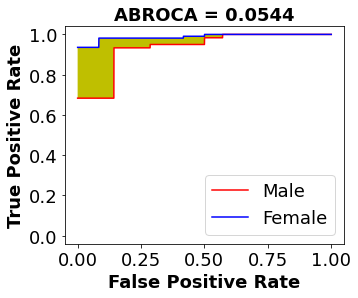

ABROCA: 0.05443266718461487


In [14]:
run_eval('student-por')

Statistical parity:
{'balanced_accuracy': 0.9202020202020202, 'accuracy': 0.9236111111111112, 'fairness': -0.2105724939679754, 'Positive_prot_pred': 0.8085106382978723, 'Positive_non_prot_pred': 0.5979381443298969, 'Negative_prot_pred': 0.19148936170212766, 'Negative_non_prot_pred': 0.4020618556701031}
Equal opportunity
{'balanced_accuracy': 0.9202020202020202, 'accuracy': 0.9236111111111112, 'fairness': 0.01025641025641022, 'TPR_protected': 0.9230769230769231, 'TPR_non_protected': 0.9333333333333333, 'TNR_protected': 0.75, 'TNR_non_protected': 0.9459459459459459}
Equalized odds
{'balanced_accuracy': 0.9202020202020202, 'accuracy': 0.9236111111111112, 'fairness': 0.20620235620235616, 'TPR_protected': 0.9230769230769231, 'TPR_non_protected': 0.9333333333333333, 'TNR_protected': 0.75, 'TNR_non_protected': 0.9459459459459459}
Predictive parity
{'balanced_accuracy': 0.9202020202020202, 'accuracy': 0.9236111111111112, 'fairness': 0.01814882032667886, 'TPR_protected': 0.9230769230769231, 'TP

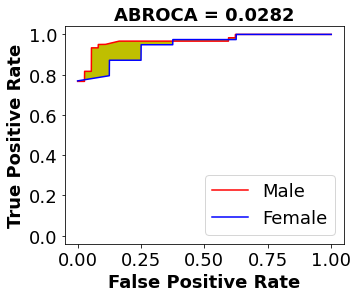

ABROCA: 0.02821922468496413


In [15]:
run_eval('xAPI-Edu')